Exercise 2.2

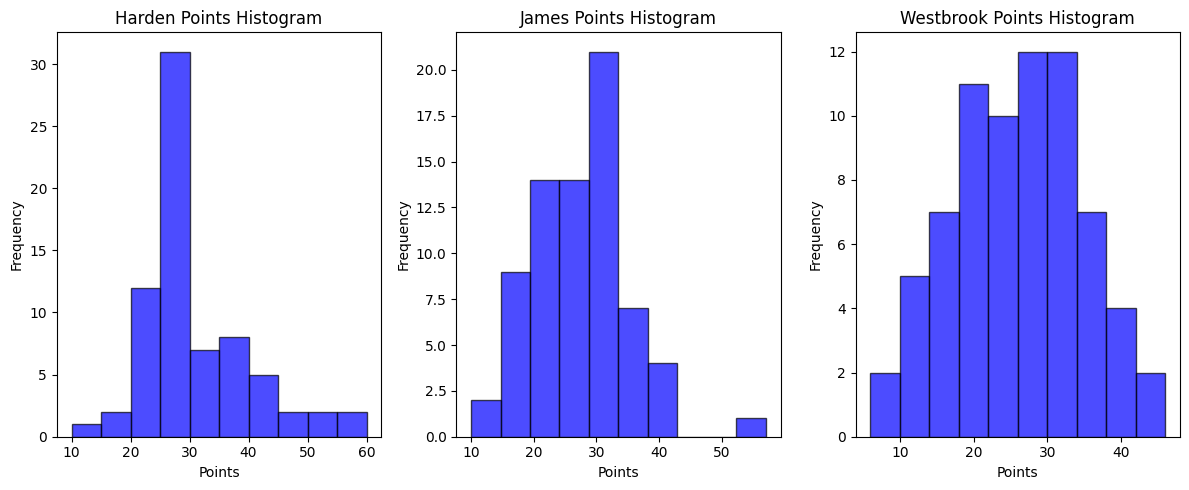

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Dataset 2.8.csv"  # Make sure the file is in the correct path
df = pd.read_csv(file_path)

# Rename columns properly by using the second row as headers
df.columns = ["Harden", "James", "Westbrook", "NaN1", "Harden_REB", "James_REB", "Westbrook_REB", "NaN2", "Harden_AST", "James_AST", "Westbrook_AST"]
df = df.iloc[1:].reset_index(drop=True)  # Remove the first row and reset index

# Drop any rows that contain non-numeric values in the points columns
df = df[pd.to_numeric(df["Harden"], errors='coerce').notna()]
df = df[pd.to_numeric(df["James"], errors='coerce').notna()]
df = df[pd.to_numeric(df["Westbrook"], errors='coerce').notna()]

# Convert points columns to numeric values
df[["Harden", "James", "Westbrook"]] = df[["Harden", "James", "Westbrook"]].apply(pd.to_numeric)

# Plot histograms for each player's points
players = ["Harden", "James", "Westbrook"]
plt.figure(figsize=(12, 5))

for i, player in enumerate(players, 1):
    plt.subplot(1, 3, i)
    plt.hist(df[player], bins=10, alpha=0.7, color='b', edgecolor='black')
    plt.title(f"{player} Points Histogram")
    plt.xlabel("Points")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


2.2 (A) The historgrams aree roughly symmetric, especially in the case of Russell Westrbook. The only one that is significantly skewed is that of James Harden as he scored between 25-30 points in almost half of his games, though he does have more high outliers than the others.

In [ ]:
import pandas as pd

# Load the dataset
file_path = "Dataset 2.8.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Rename columns properly using the second row as headers
df.columns = ["Harden", "James", "Westbrook", "NaN1", "Harden_REB", "James_REB", "Westbrook_REB", "NaN2", "Harden_AST", "James_AST", "Westbrook_AST"]
df = df.iloc[1:].reset_index(drop=True)  # Remove the first row and reset index

# Convert relevant columns to numeric
cols = ["Harden", "James", "Westbrook", "Harden_REB", "James_REB", "Westbrook_REB", "Harden_AST", "James_AST", "Westbrook_AST"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# Compute sample mean and median
stats = {}
players = ["Harden", "James", "Westbrook"]
categories = {"Points": "", "Rebounds": "_REB", "Assists": "_AST"}

for category, suffix in categories.items():
    stats[category] = {}
    for player in players:
        col_name = player + suffix
        stats[category][player] = {
            "Mean": df[col_name].mean(),
            "Median": df[col_name].median()
        }

# Determine the best player based on the highest sample mean
best_players = {category: max(stats[category], key=lambda p: stats[category][p]["Mean"]) for category in categories}

# Print results
print("Sample Mean and Median for Each Player:")
for category, data in stats.items():
    print(f"\n{category}:")
    for player, values in data.items():
        print(f"  {player}: Mean = {values['Mean']:.2f}, Median = {values['Median']:.2f}")

print("\nBest Players Based on Sample Means:")
for category, player in best_players.items():
    print(f"  {category}: {player}")


Sample Mean and Median for Each Player:

Points:
  Harden: Mean = 30.43, Median = 28.00
  James: Mean = 27.02, Median = 27.00
  Westbrook: Mean = 25.35, Median = 25.50

Rebounds:
  Harden: Mean = 5.40, Median = 5.00
  James: Mean = 8.55, Median = 9.00
  Westbrook: Mean = 10.05, Median = 10.00

Assists:
  Harden: Mean = 8.75, Median = 8.50
  James: Mean = 8.98, Median = 8.25
  Westbrook: Mean = 10.25, Median = 10.00

Best Players Based on Sample Means:
  Points: Harden
  Rebounds: Westbrook
  Assists: Westbrook


In [ ]:
import pandas as pd

# Load the dataset
file_path = "Dataset 2.8.csv"  # Update if needed
df = pd.read_csv(file_path)

# Rename columns properly using the second row as headers
df.columns = ["Harden", "James", "Westbrook", "NaN1", "Harden_REB", "James_REB", "Westbrook_REB", "NaN2", "Harden_AST", "James_AST", "Westbrook_AST"]
df = df.iloc[1:].reset_index(drop=True)  # Remove the first row and reset index

# Convert relevant columns to numeric
cols = ["Harden", "James", "Westbrook", "Harden_REB", "James_REB", "Westbrook_REB", "Harden_AST", "James_AST", "Westbrook_AST"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# Compute sample mean and median
stats = {}
players = ["Harden", "James", "Westbrook"]
categories = {"Points": "", "Rebounds": "_REB", "Assists": "_AST"}

for category, suffix in categories.items():
    stats[category] = {}
    for player in players:
        col_name = player + suffix
        stats[category][player] = {
            "Mean": df[col_name].mean(),
            "Median": df[col_name].median()
        }

# Determine the best player based on the highest sample mean
best_players_mean = {category: max(stats[category], key=lambda p: stats[category][p]["Mean"]) for category in categories}

# Determine the best player based on the highest sample median
best_players_median = {category: max(stats[category], key=lambda p: stats[category][p]["Median"]) for category in categories}

# Print results
print("Sample Mean and Median for Each Player:")
for category, data in stats.items():
    print(f"\n{category}:")
    for player, values in data.items():
        print(f"  {player}: Mean = {values['Mean']:.2f}, Median = {values['Median']:.2f}")

print("\nBest Players Based on Sample Means:")
for category, player in best_players_mean.items():
    print(f"  {category}: {player}")

print("\nBest Players Based on Sample Medians:")
for category, player in best_players_median.items():
    print(f"  {category}: {player}")

# Check if the results changed
print("\nComparison of Mean vs. Median Rankings:")
for category in categories:
    if best_players_mean[category] == best_players_median[category]:
        print(f"  {category}: No change ({best_players_mean[category]})")
    else:
        print(f"  {category}: Changed from {best_players_mean[category]} (mean) to {best_players_median[category]} (median)")


Sample Mean and Median for Each Player:

Points:
  Harden: Mean = 30.43, Median = 28.00
  James: Mean = 27.02, Median = 27.00
  Westbrook: Mean = 25.35, Median = 25.50

Rebounds:
  Harden: Mean = 5.40, Median = 5.00
  James: Mean = 8.55, Median = 9.00
  Westbrook: Mean = 10.05, Median = 10.00

Assists:
  Harden: Mean = 8.75, Median = 8.50
  James: Mean = 8.98, Median = 8.25
  Westbrook: Mean = 10.25, Median = 10.00

Best Players Based on Sample Means:
  Points: Harden
  Rebounds: Westbrook
  Assists: Westbrook

Best Players Based on Sample Medians:
  Points: Harden
  Rebounds: Westbrook
  Assists: Westbrook

Comparison of Mean vs. Median Rankings:
  Points: No change (Harden)
  Rebounds: No change (Westbrook)
  Assists: No change (Westbrook)


Exercise 2.3

In [ ]:
import pandas as pd

# Load the dataset
file_path = "Copy of Dataset 2.9.csv"  # Ensure the file is in the correct path
df = pd.read_csv(file_path)

# Display column names to identify relevant data
print("Column Names:", df.columns)

# Assuming the dataset has columns for each pitcher's runs allowed per game
pitchers = ["deGrom", "Sherzer", "Snell", "Verlander"]

# Calculate the standard deviation of runs allowed for each pitcher
std_devs = {pitcher: df[pitcher].std() for pitcher in pitchers}

# Determine most and least consistent pitchers
most_consistent = min(std_devs, key=std_devs.get)
least_consistent = max(std_devs, key=std_devs.get)

# Print results
print("\nStandard Deviations of Runs Allowed:")
for pitcher, std in std_devs.items():
    print(f"  {pitcher}: {std:.2f}")

print(f"\nMost Consistent Pitcher: {most_consistent} (Lowest Std Dev)")
print(f"Least Consistent Pitcher: {least_consistent} (Highest Std Dev)")


Column Names: Index(['deGrom', 'Sherzer', 'Snell', 'Verlander'], dtype='object')

Standard Deviations of Runs Allowed:
  deGrom: 1.22
  Sherzer: 1.44
  Snell: 1.38
  Verlander: 1.74

Most Consistent Pitcher: deGrom (Lowest Std Dev)
Least Consistent Pitcher: Verlander (Highest Std Dev)


NOTE: Max Scherzer's name is misspelled as "Sherzer" in the DataSet

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "Copy of Dataset 2.9.csv"  # Ensure the file is in the correct path
df = pd.read_csv(file_path)

# Display column names to identify relevant data
print("Column Names:", df.columns)

# Assuming the dataset has columns for each pitcher's runs allowed per game
pitchers = ["deGrom", "Sherzer", "Snell", "Verlander"]

# Calculate the IQR (Interquartile Range) for each pitcher
iqr_values = {}
for pitcher in pitchers:
    Q1 = np.percentile(df[pitcher].dropna(), 25)  # First quartile (Q1)
    Q3 = np.percentile(df[pitcher].dropna(), 75)  # Third quartile (Q3)
    iqr_values[pitcher] = Q3 - Q1  # IQR = Q3 - Q1

# Determine most and least consistent pitchers based on IQR
most_consistent_iqr = min(iqr_values, key=iqr_values.get)
least_consistent_iqr = max(iqr_values, key=iqr_values.get)

# Print results
print("\nInterquartile Ranges (IQR) of Runs Allowed:")
for pitcher, iqr in iqr_values.items():
    print(f"  {pitcher}: {iqr:.2f}")

print(f"\nMost Consistent Pitcher (IQR): {most_consistent_iqr} (Lowest IQR)")
print(f"Least Consistent Pitcher (IQR): {least_consistent_iqr} (Highest IQR)")

# Compare results to standard deviation
print("\nComparison of Std Dev vs. IQR Rankings:")
for pitcher in pitchers:
    std_dev_ranking = "Most" if pitcher == most_consistent_iqr else "Least" if pitcher == least_consistent_iqr else "Middle"
    print(f"  {pitcher}: {std_dev_ranking} consistent based on IQR")


Column Names: Index(['deGrom', 'Sherzer', 'Snell', 'Verlander'], dtype='object')

Interquartile Ranges (IQR) of Runs Allowed:
  deGrom: 2.25
  Sherzer: 2.00
  Snell: 2.00
  Verlander: 2.75

Most Consistent Pitcher (IQR): Sherzer (Lowest IQR)
Least Consistent Pitcher (IQR): Verlander (Highest IQR)

Comparison of Std Dev vs. IQR Rankings:
  deGrom: Middle consistent based on IQR
  Sherzer: Most consistent based on IQR
  Snell: Middle consistent based on IQR
  Verlander: Least consistent based on IQR


Exercise 2.4:

In [ ]:
import pandas as pd

# Load the dataset
file_path = "Copy of Dataset 2.10.csv"  # Ensure the file is in the correct path
df = pd.read_csv(file_path)

# Display column names to identify relevant data
print("Column Names:", df.columns)

# Select relevant columns (assumed from description)
stats = ['COMP', 'TD ', 'INT', 'YPA', 'RATE']

# Calculate standard deviation for each statistic
std_devs = {stat: df[stat].std() for stat in stats}

# Identify the statistic with the highest standard deviation
most_variable_stat = max(std_devs, key=std_devs.get)

# Print results
print("\nStandard Deviation of QB Statistics:")
for stat, std in std_devs.items():
    print(f"  {stat}: {std:.2f}")

print(f"\nThe statistic with the most variability: {most_variable_stat}")

Column Names: Index(['Player ', 'COMP', 'TD ', 'INT', 'YPA', 'RATE'], dtype='object')

Standard Deviation of QB Statistics:
  COMP: 4.36
  TD : 1.47
  INT: 0.96
  YPA: 0.78
  RATE: 11.34

The statistic with the most variability: RATE


In [ ]:
import pandas as pd

# Load dataset
file_path = "Copy of Dataset 2.10.csv"
df = pd.read_csv(file_path)

# Clean column names (removes extra spaces)
df.columns = df.columns.str.strip()

# Define relevant statistics (ensure names match exactly)
stats = ['COMP', 'TD', 'INT', 'YPA', 'RATE']

# Convert columns to numeric (in case of formatting issues)
df[stats] = df[stats].apply(pd.to_numeric, errors='coerce')

# Compute standard deviation
std_devs = {stat: df[stat].std() for stat in stats}

# Identify the statistic with the lowest standard deviation (least variability)
least_variable_stat = min(std_devs, key=std_devs.get)

# Print results
print("\nStandard Deviation of QB Statistics:")
for stat, std in std_devs.items():
    print(f"  {stat}: {std:.2f}")

print(f"\nThe statistic with the least variability: {least_variable_stat}")



Standard Deviation of QB Statistics:
  COMP: 4.36
  TD: 1.47
  INT: 0.96
  YPA: 0.78
  RATE: 11.34

The statistic with the least variability: YPA


Exercise 2.5:

In [ ]:
import pandas as pd

# Load the dataset
file_path = "EPL2.11.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Calculate the coefficient of variation for goals scored (GF)
mean_gf = df["GF"].mean()
std_gf = df["GF"].std()
cv_gf = std_gf / mean_gf

# Find the team with the least variation (closest to the mean)
df["Deviation"] = abs(df["GF"] - mean_gf)
least_var_team = df.loc[df["Deviation"].idxmin(), "Team"]

# Output results
print(f"Coefficient of Variation for Goals Scored: {cv_gf:.3f}")
print(f"Team with the least variation in goals scored: {least_var_team}")

Coefficient of Variation for Goals Scored: 0.412
Team with the least variation in goals scored: West Ham


In [ ]:
import pandas as pd

# Load the dataset
file_path = "Bundesliga2.11.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Calculate the coefficient of variation for goals scored (GF)
mean_gf = df["GF"].mean()
std_gf = df["GF"].std()
cv_gf = std_gf / mean_gf

# Find the team with the least variation (closest to the mean)
df["Deviation"] = abs(df["GF"] - mean_gf)
least_var_team = df.loc[df["Deviation"].idxmin(), "Team"]

# Output results
print(f"Coefficient of Variation for Goals Scored: {cv_gf:.3f}")
print(f"Team with the least variation in goals scored: {least_var_team}")

Coefficient of Variation for Goals Scored: 0.326
Team with the least variation in goals scored: Borussia M.Gladbach


In [ ]:
import pandas as pd

# Load the dataset
file_path = "LaLiga2.11.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Calculate the coefficient of variation for goals scored (GF)
mean_gf = df["GF"].mean()
std_gf = df["GF"].std()
cv_gf = std_gf / mean_gf

# Find the team with the least variation (closest to the mean)
df["Deviation"] = abs(df["GF"] - mean_gf)
least_var_team = df.loc[df["Deviation"].idxmin(), "Team"]

# Output results
print(f"Coefficient of Variation for Goals Scored: {cv_gf:.3f}")
print(f"Team with the least variation in goals scored: {least_var_team}")

Coefficient of Variation for Goals Scored: 0.384
Team with the least variation in goals scored: Girona


In [ ]:
import pandas as pd

# Load the dataset
file_path = "Ligue12.11.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Calculate the coefficient of variation for goals scored (GF)
mean_gf = df["GF"].mean()
std_gf = df["GF"].std()
cv_gf = std_gf / mean_gf

# Find the team with the least variation (closest to the mean)
df["Deviation"] = abs(df["GF"] - mean_gf)
least_var_team = df.loc[df["Deviation"].idxmin(), "Team"]

# Output results
print(f"Coefficient of Variation for Goals Scored: {cv_gf:.3f}")
print(f"Team with the least variation in goals scored: {least_var_team}")

Coefficient of Variation for Goals Scored: 0.418
Team with the least variation in goals scored: Bordeaux


In [ ]:
import pandas as pd

# Load the dataset
file_path = "SerieA2.11.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Calculate the coefficient of variation for goals scored (GF)
mean_gf = df["GF"].mean()
std_gf = df["GF"].std()
cv_gf = std_gf / mean_gf

# Find the team with the least variation (closest to the mean)
df["Deviation"] = abs(df["GF"] - mean_gf)
least_var_team = df.loc[df["Deviation"].idxmin(), "Team"]

# Output results
print(f"Coefficient of Variation for Goals Scored: {cv_gf:.3f}")
print(f"Team with the least variation in goals scored: {least_var_team}")

Coefficient of Variation for Goals Scored: 0.358
Team with the least variation in goals scored: Udinese


Ligue 1 has the most variation in their team's performance. Bordeaux was the team with the least variation in Ligue 1.

In [ ]:
import pandas as pd

# Load the dataset
file_path = "EPL2.11.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Calculate the coefficient of variation for goals scored (GA)
mean_ga = df["GA"].mean()
std_ga = df["GA"].std()
cv_ga = std_ga / mean_ga

# Find the team with the least variation (closest to the mean)
df["Deviation"] = abs(df["GF"] - mean_gf)
least_var_team = df.loc[df["Deviation"].idxmin(), "Team"]

# Output results
print(f"Coefficient of Variation for Goals allowed: {cv_ga:.3f}")
print(f"Team with the least variation in goals allowed: {least_var_team}")

Coefficient of Variation for Goals allowed: 0.245
Team with the least variation in goals allowed: West Ham


In [ ]:
import pandas as pd

# Load the dataset
file_path = "Bundesliga2.11.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Calculate the coefficient of variation for goals scored (GA)
mean_ga = df["GA"].mean()
std_ga = df["GA"].std()
cv_ga = std_ga / mean_ga

# Find the team with the least variation (closest to the mean)
df["Deviation"] = abs(df["GF"] - mean_gf)
least_var_team = df.loc[df["Deviation"].idxmin(), "Team"]

# Output results
print(f"Coefficient of Variation for Goals allowed: {cv_ga:.3f}")
print(f"Team with the least variation in goals allowed: {least_var_team}")

Coefficient of Variation for Goals allowed: 0.193
Team with the least variation in goals allowed: Schalke 04


In [ ]:
import pandas as pd

# Load the dataset
file_path = "LaLiga2.11.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Calculate the coefficient of variation for goals scored (GA)
mean_ga = df["GA"].mean()
std_ga = df["GA"].std()
cv_ga = std_ga / mean_ga

# Find the team with the least variation (closest to the mean)
df["Deviation"] = abs(df["GF"] - mean_gf)
least_var_team = df.loc[df["Deviation"].idxmin(), "Team"]

# Output results
print(f"Coefficient of Variation for Goals allowed: {cv_ga:.3f}")
print(f"Team with the least variation in goals allowed: {least_var_team}")

Coefficient of Variation for Goals allowed: 0.269
Team with the least variation in goals allowed: Girona


In [ ]:
import pandas as pd

# Load the dataset
file_path = "Ligue12.11.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Calculate the coefficient of variation for goals scored (GA)
mean_ga = df["GA"].mean()
std_ga = df["GA"].std()
cv_ga = std_ga / mean_ga

# Find the team with the least variation (closest to the mean)
df["Deviation"] = abs(df["GF"] - mean_gf)
least_var_team = df.loc[df["Deviation"].idxmin(), "Team"]

# Output results
print(f"Coefficient of Variation for Goals allowed: {cv_ga:.3f}")
print(f"Team with the least variation in goals allowed: {least_var_team}")

Coefficient of Variation for Goals allowed: 0.240
Team with the least variation in goals allowed: Rennes


In [ ]:
import pandas as pd

# Load the dataset
file_path = "SerieA2.11.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Calculate the coefficient of variation for goals scored (GA)
mean_ga = df["GA"].mean()
std_ga = df["GA"].std()
cv_ga = std_ga / mean_ga

# Find the team with the least variation (closest to the mean)
df["Deviation"] = abs(df["GF"] - mean_gf)
least_var_team = df.loc[df["Deviation"].idxmin(), "Team"]

# Output results
print(f"Coefficient of Variation for Goals allowed: {cv_ga:.3f}")
print(f"Team with the least variation in goals allowed: {least_var_team}")

Coefficient of Variation for Goals allowed: 0.322
Team with the least variation in goals allowed: Udinese


Serie A has the highest variation in team performance in regards to goals allowed.

There is far less variation in these high-level soccer leagues than in the NBA, MLB, and NFL. The only comporable sport was hockey/the NHL. Which makes sense given the comporable scoring format of the two sports.

Exercise 2.6

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path_nfl = "Copy of Dataset 2.12.csv"
df_nfl = pd.read_csv(file_path_nfl)

# Clean column names
df_nfl.columns = df_nfl.columns.str.strip()

# Function to calculate entropy
def calculate_entropy(targets):
    proportions = targets / targets.sum()  # Convert to proportions
    proportions = proportions[proportions > 0]  # Remove zero values to avoid log errors
    return -np.sum(proportions * np.log2(proportions))

# Calculate entropy for each team
entropies = {team: calculate_entropy(df_nfl[team].dropna().values) for team in df_nfl.columns}

# Sort teams by entropy
sorted_teams = sorted(entropies.items(), key=lambda x: x[1], reverse=True)

# Get top 3 and bottom 3 teams
most_variable_teams = sorted_teams[:3]  # Highest entropy
least_variable_teams = sorted_teams[-3:]  # Lowest entropy

# Output results
print("Top 3 teams with most variability in passing targets:")
for team, entropy in most_variable_teams:
    print(f"{team}: {entropy:.3f}")

print("\nTop 3 teams with least variability in passing targets:")
for team, entropy in least_variable_teams:
    print(f"{team}: {entropy:.3f}")

Top 3 teams with most variability in passing targets:
DEN: 3.345
WAS: 3.316
BUF: 3.276

Top 3 teams with least variability in passing targets:
ATL: 2.955
LAR: 2.897
MIN: 2.873
